# $\S $ 11 识别手写数字

## 11.2 用scikit-learn识别手写数字

这类数据分析问题，需要用到 *估计器 (estimator)*。其借助 **fit( )**函数进行学习，待自己的预测能力（模型足够有效）达到一定水准之后，再用 **predict( )**函数给出预测结果。与之前不同，这两个数据集是由一系列图像组成的。

* 导入 **scikit-learn** 的 **svm模块**。然后创建**SVC类型**的估计器，初始化设置。无需为 **C** 和 **gamma** 设置特殊值，使用一般值即可，分析过程中可再调整。

In [1]:
from sklearn import svm
svc = svm.SVC(gamma=0.001,C=100)

## 11.3 Digit 数据集

* 手写识别问题可以使用库中的 **Digits** 图像数据集。    
* 该数据集包含 1797 张$8\times8$像素大小的灰度图，图像的内容为一个手写体数字。
* 加载数据集后，对它里面的内容分析；首先访问 **DESCR属性**，读取数据集自带的大量说明信息。

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

* 手写数字图像的数据，存储在 **digits.images数组**中。数组的每个元素代表一张图像，每个元素为$8\times8$形状的矩阵，**矩阵各项为数据类型，每个数值对应一种灰度等级，其中0对应白丝，15对应黑丝(误)。**

In [3]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

* 用 matplotlib 为数组生成灰度图图像

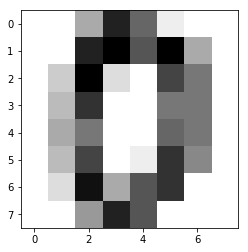

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[0],cmap=plt.cm.gray_r,interpolation='nearest')

* 图像所表示的数字，也就是目标值，存储在 **digits.targets数组**中。
* 验证下是否真的有1797张图像。

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.target.size

1797

## 11.4 学习和预测

* 考虑到**Digits**数据集的数据量很大，用它进行训练得到的模型效果肯定非常好，也就是模型识别手写数字准确率高。    
* **Digits**数据集由1797个元素组成，可以考虑用前1791个作为训练集，剩余6个作为验证集。   



* 再生成6个数字图像，以便查看细节。

([], <a list of 0 Text yticklabel objects>)

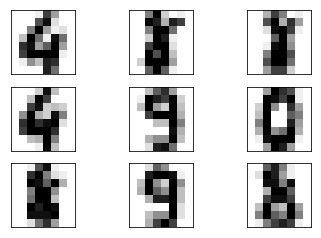

In [7]:
plt.subplot(331)
plt.imshow(digits.images[1788],cmap=plt.cm.gray_r,interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.subplot(332)
plt.imshow(digits.images[1789],cmap=plt.cm.gray_r,interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.subplot(333)
plt.imshow(digits.images[1790],cmap=plt.cm.gray_r,interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.subplot(334)
plt.imshow(digits.images[1791],cmap=plt.cm.gray_r,interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.subplot(335)
plt.xticks(())
plt.yticks(())
plt.imshow(digits.images[1792],cmap=plt.cm.gray_r,interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.subplot(336)
plt.imshow(digits.images[1793],cmap=plt.cm.gray_r,interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.subplot(337)
plt.imshow(digits.images[1794],cmap=plt.cm.gray_r,interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.subplot(338)
plt.imshow(digits.images[1795],cmap=plt.cm.gray_r,interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.subplot(339)
plt.imshow(digits.images[1796],cmap=plt.cm.gray_r,interpolation='nearest')
plt.xticks(())
plt.yticks(())



* 让先前定义的 **svc估计器** 进行学习。

In [8]:
svc.fit(digits.data[1:1790],digits.target[1:1790])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

* 用估计器预测验证集的6个数字，测试估计器结果。

In [9]:
svc.predict(digits.data[1791:1797])

array([4, 9, 0, 8, 9, 8])

* 与验证集各图像表示的数字相比：

In [10]:
digits.target[1791:1797]

array([4, 9, 0, 8, 9, 8])

* 可见对于验证集的6个数字都能全部正确预测